<a href="https://colab.research.google.com/github/NYahirGranadosVargas/Proyectos-/blob/main/Proyecto_M3_Modelado_Supervisado_Nestor_Yahir_Granados_Vargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning



¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 3! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Esta actividad constará de dos partes. Revisa con cuidado cada una de las instrucciones y procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento,
  - predecirás con conjunto de pruebas.
* Aplicarás cuadros de confusión y medirás la precisión.
* Graficarás mapas de calor a partir del cuadro de confusión.
* Utilizarás métricas MSE, RMSE y R2.

## Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- `Experiencia`: Años de experiencia en el área.
- `Posición`: Posición que busca; existen tres opciones:
  - `Analista`
  - `Coordinador`
  - `Gerente`
- `Hijos`: Número de hijos que tiene.
- `Casado`: ¿El postulante está casado?
  - `0`: No
  - `1`: Sí
- `Educación`: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:
  - `Bachillerato`
  - `Licenciatura`
  - `Posgrado`
- `Salario`: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

### Criterios de evaluación:
- Modelar regresión lineal correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizar conjuntos,
  - aplicar modelo,
  - entrenar con conjunto de entrenamiento,
  - predecir con conjunto de pruebas.

> **Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará **un punto**.

- Aplicar por lo menos dos métricas (**2 puntos**):
  - **MSE**,
  - **RMSE** o
  - **R2**.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Funciones de sklearn para estandarizar/normalizar los datos
from sklearn.preprocessing import StandardScaler


#Función de Sklearn para trabajar con dummies
from sklearn.dummy           import DummyClassifier

#Funciones de Sklearn para trabajar con Regresión Lineal y Logística
from sklearn.linear_model  import LogisticRegression
from sklearn.linear_model  import LinearRegression


#Funciones adicionales (complemento)
from sklearn.linear_model    import Lasso
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.model_selection import train_test_split

#Comando para ver el total de columnas y filas en head
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **Desarrollo de la parte número 1**

---

*Primero realizamos EDA para observar las variables involucradas y determinar que tipo de encoder utilizar;
ya sea un codificador/encoder para una variable categorica a ordinal (Label Encoder) o bien un codificador/encoder que binarice la clasificación de la etiqueta (de tipo dummie) sin darle un "peso/valor" a la variable.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar datos
df = pd.read_csv('/content/drive/MyDrive/Ucamp/rrhh.csv')

In [ ]:
#Función para describir la estructura de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [ ]:
#Función para observar la cabeza de la estructura
df.head(3)

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880


In [ ]:
#Función para observar el final/la cola de la estructura
df.tail(3)

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
997,11.4,Analista,0,0,Licenciatura,38840
998,9.9,Analista,2,1,Bachillerato,45660
999,10.2,Analista,3,1,Bachillerato,55210


In [ ]:
#Aplicamos la función dummie para la variable categorica de Posición
df = pd.get_dummies(data = df, columns=['Posicion'])

In [ ]:
df.head(5)

,Experiencia,Hijos,Casado,Educacion,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
0,0.5,4,1,Bachillerato,13540,1,0,0
1,5.6,2,0,Licenciatura,31240,1,0,0
2,11.7,1,0,Licenciatura,63880,1,0,0
3,5.2,2,1,Licenciatura,29960,1,0,0
4,7.2,2,1,Licenciatura,34710,0,1,0


In [ ]:
#Aplicamos Label Encoder ya que Bachillerato, Licenciatura y Posgrado ya que es una
#variable categorica a la que se le puede asignar un valor ordinal.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df['Educacion'] = labelencoder.fit_transform(df['Educacion'])

In [ ]:
df.head(30)

,Experiencia,Hijos,Casado,Educacion,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
0,0.5,4,1,0,13540,1,0,0
1,5.6,2,0,1,31240,1,0,0
2,11.7,1,0,1,63880,1,0,0
3,5.2,2,1,1,29960,1,0,0
4,7.2,2,1,1,34710,0,1,0
5,7.2,2,1,0,32210,1,0,0
6,1.3,1,1,0,15370,1,0,0
7,8.1,1,0,0,22930,1,0,0
8,5.6,1,0,1,38830,1,0,0
9,6.2,1,0,2,33300,0,1,0


Criterios de evaluación:
Modelar regresión lineal correctamente (2 puntos):
hacer dummies a valores categóricos,
«splitear» dataframe,
estandarizar conjuntos,
aplicar modelo,
entrenar con conjunto de entrenamiento,
predecir con conjunto de pruebas.

In [ ]:
df.columns

Index(['Experiencia', 'Hijos', 'Casado', 'Educacion', 'Salario',
       'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente'],
      dtype='object')

In [ ]:
# Hacemos la asignacion de valores columna para poder tener nuestras variables dependientes e independientes
X = df[['Experiencia', 'Hijos', 'Casado', 'Educacion','Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente']] # Variables independientes
y = df['Salario']

In [ ]:
df.describe()

,Experiencia,Hijos,Casado,Educacion,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.416200,1.453000,0.595000,0.569000,30787.060000,0.790000,0.151000,0.059000
std,2.577612,1.208823,0.491138,0.667596,11520.200049,0.407512,0.358228,0.235743
min,0.100000,0.000000,0.000000,0.000000,5630.000000,0.000000,0.000000,0.000000
25%,4.600000,0.000000,0.000000,0.000000,22557.500000,1.000000,0.000000,0.000000
50%,6.400000,1.000000,1.000000,0.000000,29470.000000,1.000000,0.000000,0.000000
75%,8.100000,2.000000,1.000000,1.000000,37922.500000,1.000000,0.000000,0.000000
max,15.200000,4.000000,1.000000,2.000000,83470.000000,1.000000,1.000000,1.000000


In [ ]:
df.corr()

,Experiencia,Hijos,Casado,Educacion,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
Experiencia,1.000000,-0.001522,0.002578,-0.001814,0.663780,-0.024680,0.034965,-0.010470
Hijos,-0.001522,1.000000,0.327876,0.004023,0.211630,-0.018024,-0.012490,0.050136
Casado,0.002578,0.327876,1.000000,0.053258,0.085462,-0.030258,0.012261,0.033674
Educacion,-0.001814,0.004023,0.053258,1.000000,0.245064,-0.274154,0.209621,0.155378
Salario,0.663780,0.211630,0.085462,0.245064,1.000000,-0.369587,0.160906,0.394371
Posicion_Analista,-0.024680,-0.018024,-0.030258,-0.274154,-0.369587,1.000000,-0.817972,-0.485663
Posicion_Coordinador,0.034965,-0.012490,0.012261,0.209621,0.160906,-0.817972,1.000000,-0.105600
Posicion_Gerente,-0.010470,0.050136,0.033674,0.155378,0.394371,-0.485663,-0.105600,1.000000


In [ ]:
#Cojunto de pruebas y entrenamiento
from sklearn.model_selection import train_test_split  # importamos la funcion que vamos a usar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train

array([[ 0.55518894,  1.27604875,  0.83706647, ...,  0.50624244,
        -0.41015156, -0.25264558],
       [-0.580012  , -1.20332058, -1.19464826, ...,  0.50624244,
        -0.41015156, -0.25264558],
       [ 0.55518894, -0.37686414, -1.19464826, ...,  0.50624244,
        -0.41015156, -0.25264558],
       ...,
       [ 0.82006916, -0.37686414,  0.83706647, ...,  0.50624244,
        -0.41015156, -0.25264558],
       [-0.35297181, -1.20332058,  0.83706647, ..., -1.97533814,
         2.43812314, -0.25264558],
       [-0.20161169,  1.27604875,  0.83706647, ..., -1.97533814,
         2.43812314, -0.25264558]])

In [ ]:
from sklearn.linear_model import LinearRegression
modelo_LinReg = LinearRegression(normalize=True)
modelo_LinReg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [ ]:
predic_y=modelo_LinReg.predict(X_test)
predic_y

array([39136.82336344, 31688.95300168, 28764.138177  , 35223.96624731,
       22566.20868144, 26221.90110121, 45577.64597071, 37076.33618177,
        8740.41128229, 33259.22660867, 31880.56796233, 18057.00126509,
       24536.75622418, 40866.28342184, 29062.31332711, 42455.40828128,
       31425.70792666, 12694.27885217, 40600.80764491, 33820.6468338 ,
       36403.62188879, 22831.68445837, 33820.6468338 , 32953.01285255,
       30471.44064472, 32427.86920278, 32569.35946733, 41021.89267107,
       21994.51914838, 42358.42928703, 60359.25485162, 17225.6438592 ,
       16349.69879737, 29562.79620971, 55925.94286454, 33492.00301242,
       22268.03353133, 30457.32166004, 22610.52386281, 28733.66950574,
       49075.69452826, 25931.76455711, 37196.74449196, 21712.69368486,
       38783.63864949, 26511.76517074, 48609.02259547, 38313.50456356,
       26777.24094767, 28178.32965927, 27920.89248835, 37664.37540141,
       26495.41548415, 32977.40114515, 19433.42920952, 35779.30609378,
      

In [ ]:
pd.DataFrame({'Valor_Real':y_test,
              'Valor_Predic': predic_y}).head()

,Valor_Real,Valor_Predic
507,37020,39136.823363
818,24920,31688.953002
452,29790,28764.138177
368,24070,35223.966247
242,27990,22566.208681


In [ ]:
X.columns

Index(['Experiencia', 'Hijos', 'Casado', 'Educacion', 'Posicion_Analista',
       'Posicion_Coordinador', 'Posicion_Gerente'],
      dtype='object')

In [ ]:
dfp=pd.DataFrame(X_train.T,X.columns)
dfp=dfp.T
dfp.head()

,Experiencia,Hijos,Casado,Educacion,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
0,0.555189,1.276049,0.837066,-0.867651,0.506242,-0.410152,-0.252646
1,-0.580012,-1.203321,-1.194648,0.597976,0.506242,-0.410152,-0.252646
2,0.555189,-0.376864,-1.194648,-0.867651,0.506242,-0.410152,-0.252646
3,-0.466492,1.276049,-1.194648,-0.867651,0.506242,-0.410152,-0.252646
4,-0.655692,-0.376864,0.837066,0.597976,-1.975338,2.438123,-0.252646


In [ ]:
df_coeficientes = pd.DataFrame(
                        {'predictor': dfp.columns,
                         'coef': modelo_LinReg.coef_.flatten()}
                  )

In [ ]:
df_coeficientes.head()

,predictor,coef
0,Experiencia,7447.812653
1,Hijos,2708.254070
2,Casado,836.369318
3,Educacion,2130.308976
4,Posicion_Analista,-1875.925984


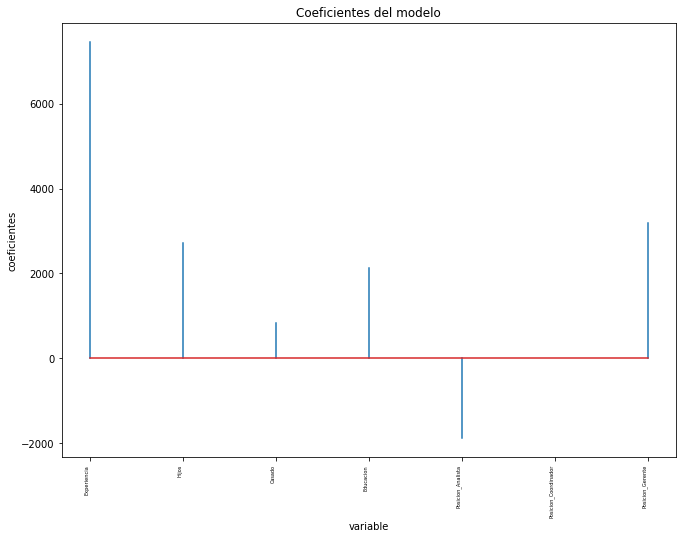

In [ ]:
fig, ax = plt.subplots(figsize=(11, 8))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
modelo_LinReg.coef_[0:8]

array([ 7.44781265e+03,  2.70825407e+03,  8.36369318e+02,  2.13030898e+03,
       -1.87592598e+03, -2.38548609e+00,  3.18660814e+03])

In [ ]:
modelo_LinReg.intercept_

30800.68

In [ ]:
#Valores prediecidos
prediccion = modelo_LinReg.predict(X_test)
prediccion=prediccion.flatten()
prediccion[:200]


array([39136.82336344, 31688.95300168, 28764.138177  , 35223.96624731,
       22566.20868144, 26221.90110121, 45577.64597071, 37076.33618177,
        8740.41128229, 33259.22660867, 31880.56796233, 18057.00126509,
       24536.75622418, 40866.28342184, 29062.31332711, 42455.40828128,
       31425.70792666, 12694.27885217, 40600.80764491, 33820.6468338 ,
       36403.62188879, 22831.68445837, 33820.6468338 , 32953.01285255,
       30471.44064472, 32427.86920278, 32569.35946733, 41021.89267107,
       21994.51914838, 42358.42928703, 60359.25485162, 17225.6438592 ,
       16349.69879737, 29562.79620971, 55925.94286454, 33492.00301242,
       22268.03353133, 30457.32166004, 22610.52386281, 28733.66950574,
       49075.69452826, 25931.76455711, 37196.74449196, 21712.69368486,
       38783.63864949, 26511.76517074, 48609.02259547, 38313.50456356,
       26777.24094767, 28178.32965927, 27920.89248835, 37664.37540141,
       26495.41548415, 32977.40114515, 19433.42920952, 35779.30609378,
      

In [ ]:
print ("Tamaño del x de preuba",X_test.shape, "Tamaño de la x de entrenamiento",X_train.shape)


Tamaño del x de preuba (750, 7) Tamaño de la x de entrenamiento (250, 7)


In [ ]:
aux=pd.DataFrame({'Valor Real': y_test,
                  'Valor predicho': prediccion})
aux.head()

,Valor Real,Valor predicho
507,37020,39136.823363
818,24920,31688.953002
452,29790,28764.138177
368,24070,35223.966247
242,27990,22566.208681


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# RMSE - Para cada punto entre el real y prediccion que tan fuera de la linea estas
from sklearn.metrics import mean_squared_error
rmse_ols = mean_squared_error(
            y_real  = y_test,
            y_predic  = prediccion,
            squared = False
           )
print("")
print(f"El error cuadrático medio de test es: {rmse_ols}")

TypeError: ignored

# **Fin de la parte 1**
---

In [ ]:
df.head()

,Experiencia,Hijos,Casado,Educacion,Salario,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
0,0.5,4,1,0,13540,1,0,0
1,5.6,2,0,1,31240,1,0,0
2,11.7,1,0,1,63880,1,0,0
3,5.2,2,1,1,29960,1,0,0
4,7.2,2,1,1,34710,0,1,0


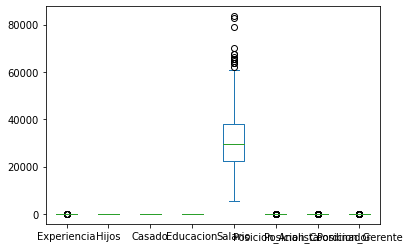

In [ ]:
df.plot(kind='box')

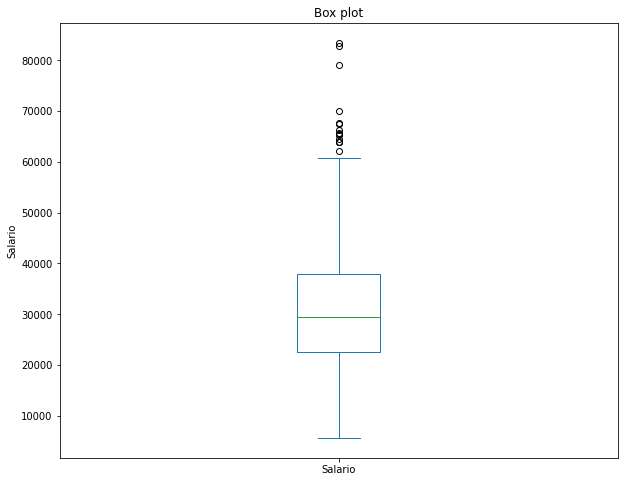

In [ ]:
# Existen valores que se salen en la columna de salarios
df['Salario'].plot(kind='box',figsize=(10,8))
plt.title('Box plot')
plt.ylabel('Salario')
plt.show()

In [ ]:
# Obtenemos los quartiles

q1 = df['Salario'].quantile(0.25)
q3 = df['Salario'].quantile(0.75)
iqr = q3-q1 #Interquartile range    #*   Q1 (25%)     #*   Q3 (75%)    #*   IQR = Q3 - Q1
Q_bajo = q1-1.5*iqr
Q_alto = q3+1.5*iqr

df = df.loc[(df['Salario'] > Q_bajo) & (df['Salario'] < Q_alto)]

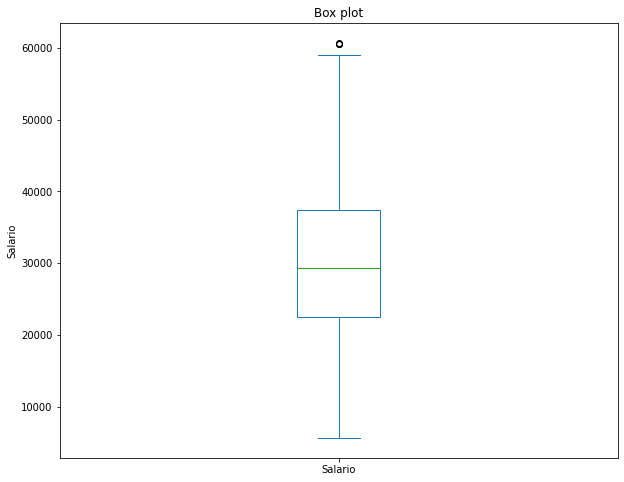

In [ ]:
df['Salario'].plot(kind='box',figsize=(10,8))
plt.title('Box plot')
plt.ylabel('Salario')
plt.show()

## Segunda parte

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este *link*: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la **parte 1**, aunque ahora incluye una nueva columna, llamada `Contratado`, la cual tiene un `1` si el postulante fue contratado y un `0` si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

### Criterios de evaluación:
- Modelar la regresión logística correctamente (**2 puntos**):
  - hacer _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizar conjuntos,
  - aplicar modelo,
  - entrenar con conjunto de entrenamiento,
  - predecir con conjunto de pruebas.

> **Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará **un punto**.

- Aplicar cuadro de confusión y medir la precisión (**2 puntos**).
- Graficar un mapa de calor del cuadro de confusión (**2 puntos**).
- Aplicar un modelo de clasificación diferente (el que quieras) e indicar su precisión
- Graficar un mapa de calor del cuadro de confusión del nuevo modelo (**2 puntos**).

> **Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará **un punto**.

> En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Ucamp/rrhh_2.csv')

In [ ]:
df2.head()


,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


# **Desarrollo de la parte númer 2**

---

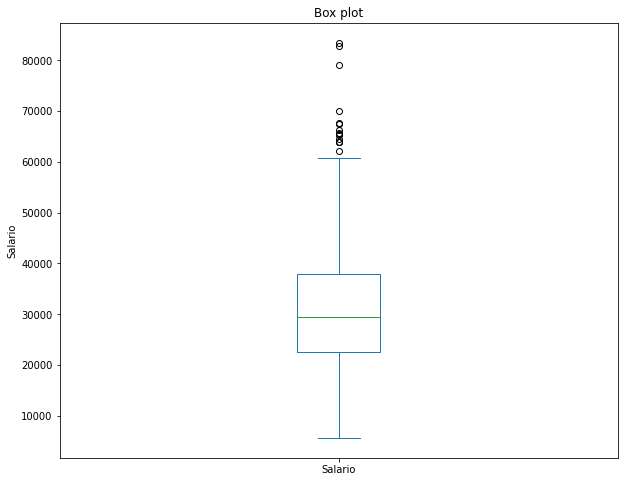

In [ ]:
df2['Salario'].plot(kind='box',figsize=(10,8))
plt.title('Box plot')
plt.ylabel('Salario')
plt.show()

In [ ]:
q1 = df['Salario'].quantile(0.25)
q3 = df['Salario'].quantile(0.75)
iqr = q3-q1 #Interquartile range    #*   Q1 (25%)     #*   Q3 (75%)    #*   IQR = Q3 - Q1
Q_bajo = q1-1.5*iqr
Q_alto = q3+1.5*iqr

df2 = df2.loc[(df2['Salario'] > Q_bajo) & (df2['Salario'] < Q_alto)]

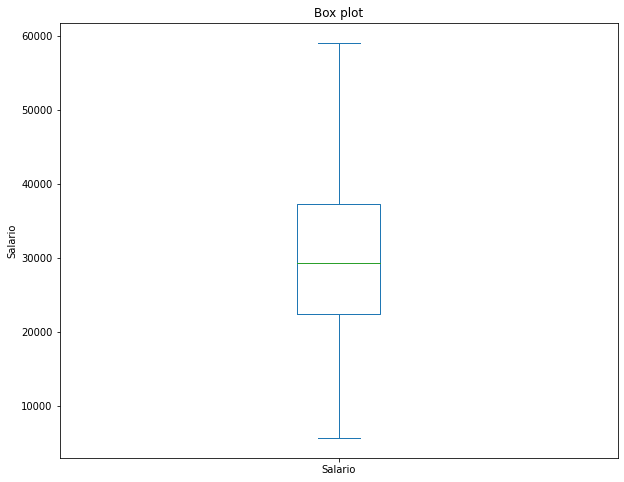

In [ ]:
df2['Salario'].plot(kind='box',figsize=(10,8))
plt.title('Box plot')
plt.ylabel('Salario')
plt.show()

In [ ]:
#Aplicamos la función dummie  de pandas para la variable categorica de Posición
df2 = pd.get_dummies(data = df2, columns=['Posicion'])
df2.head()

,Experiencia,Hijos,Casado,Educacion,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
0,0.5,4,1,Bachillerato,13540,1,1,0,0
1,5.6,2,0,Licenciatura,31240,0,1,0,0
3,5.2,2,1,Licenciatura,29960,1,1,0,0
4,7.2,2,1,Licenciatura,34710,1,0,1,0
5,7.2,2,1,Bachillerato,32210,0,1,0,0


In [ ]:
#Aqui transformamos la variable educacion en un valor binario
df2['Educacion'] = labelencoder.fit_transform(df2['Educacion'])
df2.head()

,Experiencia,Hijos,Casado,Educacion,Salario,Contratado,Posicion_Analista,Posicion_Coordinador,Posicion_Gerente
0,0.5,4,1,0,13540,1,1,0,0
1,5.6,2,0,1,31240,0,1,0,0
3,5.2,2,1,1,29960,1,1,0,0
4,7.2,2,1,1,34710,1,0,1,0
5,7.2,2,1,0,32210,0,1,0,0


In [ ]:
df['Educacion'].head(25)

0     0
1     1
3     1
4     1
5     0
6     0
7     0
8     1
9     2
10    1
11    1
12    0
13    1
14    1
15    1
16    0
17    0
18    1
19    1
20    0
22    1
23    0
24    0
25    2
26    1
Name: Educacion, dtype: int64

In [ ]:
df2.columns

Index(['Experiencia', 'Hijos', 'Casado', 'Educacion', 'Salario', 'Contratado',
       'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente'],
      dtype='object')

In [ ]:
# variable de interes Contratado, asignamos valores
X=df2[['Experiencia', 'Hijos', 'Casado', 'Educacion', 'Salario',
       'Posicion_Analista', 'Posicion_Coordinador', 'Posicion_Gerente']]
y=df2[ 'Contratado']

In [ ]:
#Spliteamos la orden en conjunto de entrenamiento y en conjunto de pruebas.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=40)

In [ ]:
#Escalamos los valores de X.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
modelo_2 = LogisticRegression()

In [ ]:
modelo_2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = modelo_2.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[245, 129],
       [ 97, 315]])

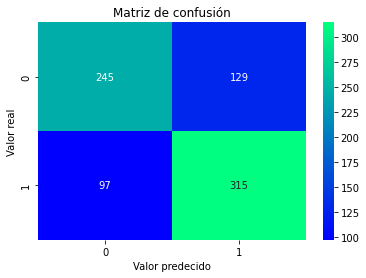

In [ ]:
sns.heatmap(cm, annot= True, fmt= '.0f', cmap= 'winter')
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

In [ ]:
# Caculamos la eficiencia del modelo
(cm[0,0] + cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1] + cm[1,0])

0.712468193384224

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors= 3)
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = modelo_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[276,  98],
       [ 62, 350]])

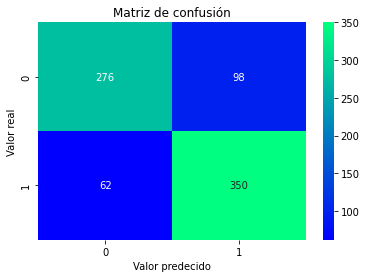

In [ ]:
sns.heatmap(cm_knn, annot= True, fmt= '.0f', cmap= 'winter')
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

In [ ]:
(cm_knn[0,0] + cm_knn[1,1])/(cm_knn[0,0]+cm_knn[1,1]+cm_knn[0,1] + cm_knn[1,0])

0.7964376590330788

# **Fin de la parte 2**
---


> **Punto extra**


Indica el F1 *score* para los modelos de clasificación que has hecho y explícalos.

*Este* tema lo puedes revisar nuevamente en tu curso de la semana 11.

# **Fin del apartado para la obtención del punto extra**
---